In [15]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from Code.descent_methods import *
from Code.utilities import MSE_grad, train_test_split, plot_test_results, MSE_grad, MSELoss
# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling

import numpy as np

In [16]:
# Initialise beta
num_features = 15
beta0 = {"b" : np.random.random(num_features)}

# Sample points and split in train and test
num_points = 100
data = r2_sampling(num_points, sigma2=0.3)
x, y, z = data["x"], data["y"], data["z"]
X = feature_matrix_2d(x, y, num_features)
X_train, y_train, X_test, y_test, test_index = train_test_split(X, z, 0.2)

### TODO: dette er en quickfix...
y_train, y_test = np.squeeze(y_train), np.squeeze(y_test)

# Number of of minibatch when using batch size 10
m = int(len(y_train) / 10) 
epochs = 50

# Define the polynomial fit model
def model(beta, X):
    # print(beta)
    return np.dot(X, beta["b"])

loss_func = lambda beta, X, y : MSELoss(y, model(beta, X))
loss_grad = lambda beta, X, y : {"b" : MSE_grad(model)(beta, X, y) }

### Plain GD

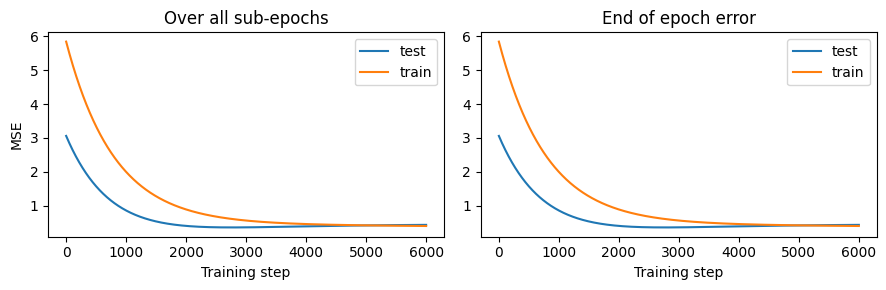

In [24]:
result_GD = GD(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
               n_epochs=6000)
plot_test_results(result_GD["test_loss_list"], result_GD["train_loss_list"], 1)

### Stochastic

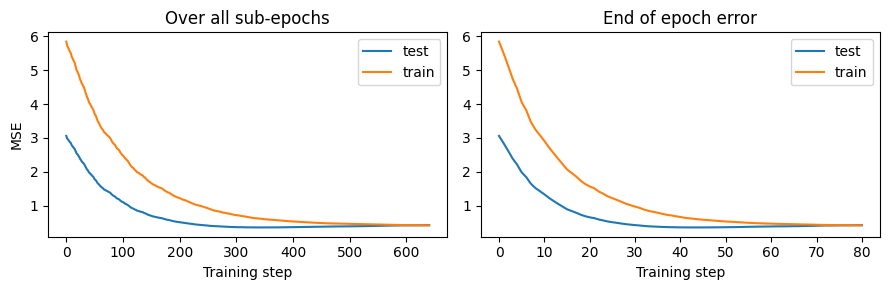

In [26]:
result_SGD = SGD(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                 n_epochs=80)
plot_test_results(result_SGD["test_loss_list"], result_SGD["train_loss_list"], m)

### Adagrad

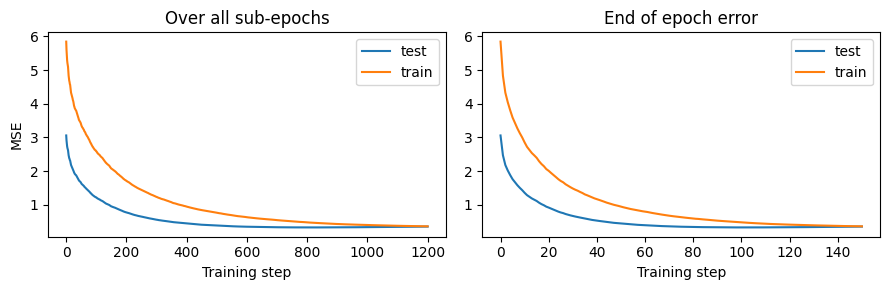

In [29]:
result_adagrad = SGD_adagrad(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                             n_epochs=150)
plot_test_results(result_adagrad["test_loss_list"], result_adagrad["train_loss_list"], m)

### RMS prop

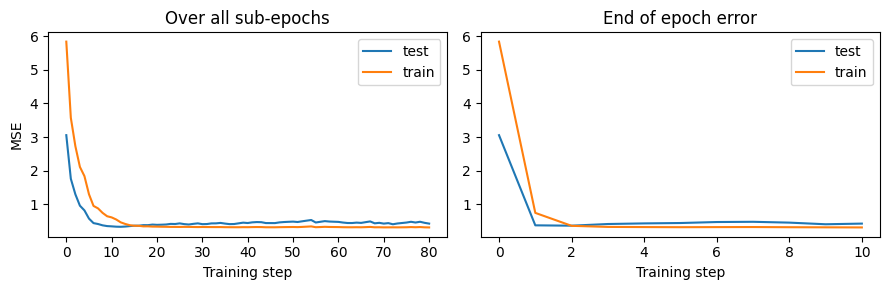

In [32]:
result_RMS_prop = SGD_RMS_prop(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                               n_epochs=10)
plot_test_results(result_RMS_prop["test_loss_list"], result_RMS_prop["train_loss_list"], m)

### Adam

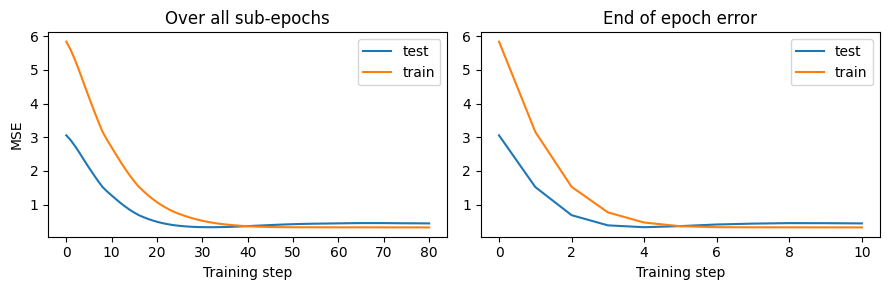

In [33]:
result_adam = SGD_adam(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                       n_epochs=10)
plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], m)